<a href="https://colab.research.google.com/github/rmorlowski/Artificial-Intelligence-Deep-Learning/blob/master/CIFAR10_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CIFAR10 Deep Learning Image Recognition

This assignment also concerns computer vision. But here we are concerned with deep learning, a neural network with more than one hidden layer. You are asked to create deep neural networks and to analyze how various factors affect the fitting and ultimate test set performance of these networks.

**The Benchmark Experiment: ** Network Topologies. Think in terms of exploring alternative network structures/topologies, such as (1) dense versus convolutional neural networks, (2) single- versus multi-hidden-layer networks, and/or (3) convolutional neural networks with differing structures in terms of convolution and pooling layers. Explain your motivation for choosing each topology.

Relevant documentation includes:
*   [B. Antonio - Image Classification: CIFAR-10](https://medium.com/@bian0628/image-classification-cifar-10-dc1c23db46d5)
*   [F. Chollet - Deep Learning with Python](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb)
*   [A. Geitgay- Deep Learning: Image Recognition](https://www.lynda.com/Python-tutorials/Deep-Learning-Image-Recognition/628707-2.html)
*   [A. Kumar - Achieving 90% accuracy in Object Recognition Task on CIFAR-10 Dataset with Keras](https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/)

Among the network topologies (structures) you test in this assignment, there should be at least one network with two hidden layers and a network that employs convolution operators (that is, a convolutional neural network). A useful exercise is to compare processing requirements and predictive accuracy of networks with two, three, or more hidden layers, with at least one (but perhaps more than one) of those layers involving a convolution operator.

---


### Section 1: Ingest - Data Survey

For this assignment we will develop a neural network classifier that may be used to predict which of the ten images is present.

Check for GPU

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Import packages

In [0]:
import keras
import time
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.models import Sequential
from pathlib import Path

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas  as pd

**CIFAR10 Dataset**

In [0]:
# List of names for each CIFAR10 class
cifar10_class_names = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

Gather data for the XXX

Load Train/Test split of the CIFAR10 dataset in preparation for modeling.

In [0]:
# Load the entire data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 10s 0us/step


#### Scale Data

In [0]:
# Normalize data set to 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
#test split 'train'
x_train.shape

(50000, 32, 32, 3)

In [0]:
#test split 'test'
x_test.shape

(10000, 32, 32, 3)

### Section 2: EDA

**Visualize CIFAR10**

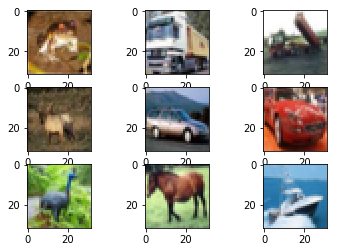

In [0]:
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### Section 3: Modeling - Neural Networks

In summary, this section fits a number of neural networks, comparing processing time and performance across experimental treatments.

#### DNN

DNN Model - 1 hidden layer with a fully connected dense neural network, 30 epochs

In [0]:
# Create a model and add layers
model = Sequential()
model.add(Dense(512, activation="relu", input_shape=(32, 32, 3)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# Print a summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32, 32, 512)       2048      
_________________________________________________________________
flatten_1 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5242890   
Total params: 5,244,938
Trainable params: 5,244,938
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
# Train the model
%%time
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True
)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 18s 368us/step - loss: 1.9425 - acc: 0.4130 - val_loss: 1.5112 - val_acc: 0.4668
Epoch 2/30
50000/50000 [==============================] - 17s 346us/step - loss: 1.4876 - acc: 0.4814 - val_loss: 1.4842 - val_acc: 0.4823
Epoch 3/30
50000/50000 [==============================] - 17s 343us/step - loss: 1.4311 - acc: 0.5052 - val_loss: 1.5264 - val_acc: 0.4673
Epoch 4/30
50000/50000 [==============================] - 17s 343us/step - loss: 1.3931 - acc: 0.5190 - val_loss: 1.4983 - val_acc: 0.4741
Epoch 5/30
50000/50000 [==============================] - 17s 345us/step - loss: 1.3557 - acc: 0.5302 - val_loss: 1.4934 - val_acc: 0.4854
Epoch 6/30
50000/50000 [==============================] - 17s 342us/step - loss: 1.3186 - acc: 0.5436 - val_loss: 1.4834 - val_acc: 0.4881
Epoch 7/30
50000/50000 [==============================] - 17s 341us/

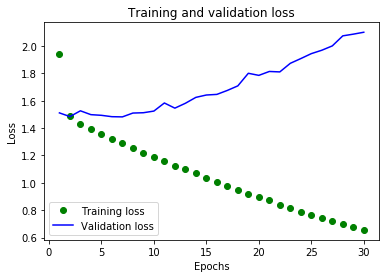

In [0]:
# Plotting the training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

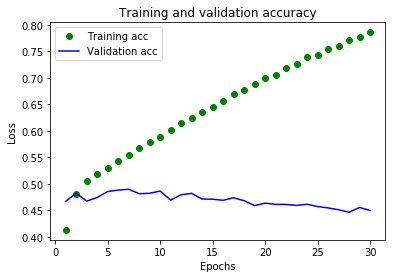

In [0]:
# Plotting the training and validation accuracy
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[503  40  55  59  34  19  21  51 116 102]
 [ 40 461  22  50  24  20  20  38  50 275]
 [ 88  20 306 140 132  46 110  79  29  50]
 [ 30  24  87 390  83 120 146  68  25  27]
 [ 47   9 132  94 384  39 154 113  15  13]
 [ 36  16  77 259  84 287  88  97  34  22]
 [ 12  12  97 134 117  49 506  33  17  23]
 [ 38  14  62  88  86  57  47 542  23  43]
 [139  59  21  72  18  16  22  32 528  93]
 [ 50 129  26  43  20  15  25  41  61 590]]


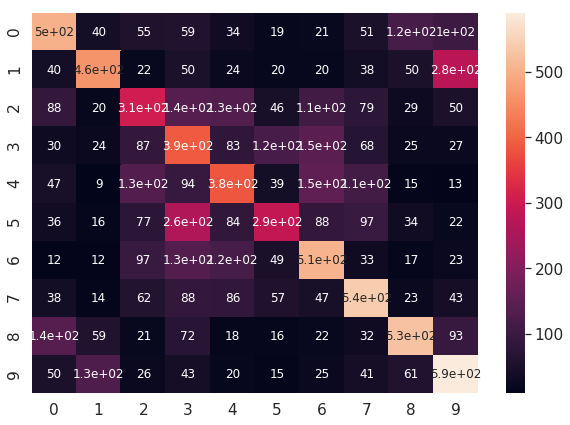

In [0]:
# Visualizing of confusion matrix
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

#### CNN - 2 layer model

CNN Model - 2 convolution layers with varying nodes per layer, 30 epochs

In [0]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [0]:
# Print a summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
__________

In [0]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
# Train the model
%%time
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 9s 181us/step - loss: 1.5300 - acc: 0.4438 - val_loss: 1.2272 - val_acc: 0.5577
Epoch 2/30
50000/50000 [==============================] - 6s 118us/step - loss: 1.1892 - acc: 0.5765 - val_loss: 1.0309 - val_acc: 0.6423
Epoch 3/30
50000/50000 [==============================] - 6s 118us/step - loss: 1.0587 - acc: 0.6276 - val_loss: 0.9321 - val_acc: 0.6768
Epoch 4/30
50000/50000 [==============================] - 6s 118us/step - loss: 0.9815 - acc: 0.6537 - val_loss: 0.8724 - val_acc: 0.6985
Epoch 5/30
50000/50000 [==============================] - 6s 123us/step - loss: 0.9036 - acc: 0.6813 - val_loss: 0.8374 - val_acc: 0.7151
Epoch 6/30
50000/50000 [==============================] - 6s 129us/step - loss: 0.8654 - acc: 0.6954 - val_loss: 0.8152 - val_acc: 0.7180
Epoch 7/30
50000/50000 [==============================] - 6s 118us/step - loss: 0.8186 - acc: 0.7116 - val_loss: 0.7929 - 

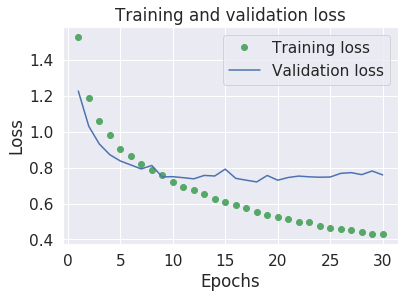

In [0]:
# Plotting the training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

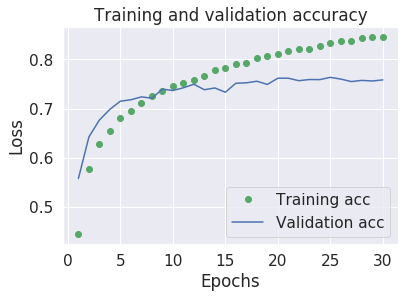

In [0]:
# Plotting the training and validation accuracy
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The CNN model appears to be overfitting with performance maxing out early.

Create a confusion matrix to assess accuracy.

In [0]:
# create confusion matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[813   7  30  22  17   6   7  12  55  31]
 [ 16 815   3   8   7   5   8   2  33 103]
 [ 70   3 612  80 101  52  37  25  14   6]
 [ 22   5  43 630  70 138  37  28  12  15]
 [ 18   2  40  73 760  18  24  55   7   3]
 [ 13   4  25 207  45 630  16  44  10   6]
 [ 11   3  29  71  62  17 792   5   6   4]
 [ 13   1  24  41  49  43   3 815   5   6]
 [ 61  15   9  11   7   5   4   5 863  20]
 [ 25  37   7  20   9   5   3  10  30 854]]


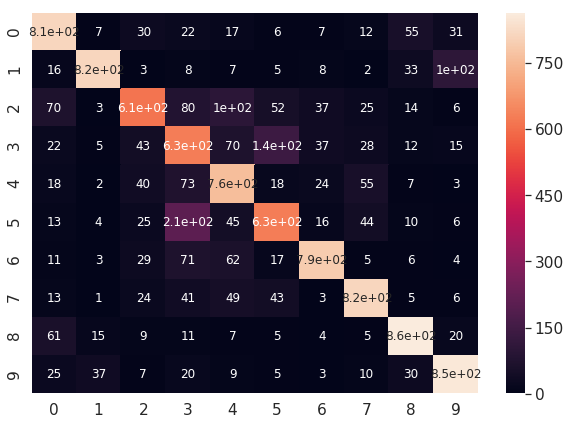

In [0]:
# Visualizing of confusion matrix
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

#### CNN - 4 layer model

CNN Model - 4 convolution layers with varying nodes per layer, 30 epochs

In [0]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [0]:
# Print a summary of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [0]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
# Train the model
%%time
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_test, y_test),
    shuffle=True
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 8s 165us/step - loss: 1.5018 - acc: 0.4537 - val_loss: 1.1887 - val_acc: 0.5879
Epoch 2/30
50000/50000 [==============================] - 8s 158us/step - loss: 1.0740 - acc: 0.6201 - val_loss: 0.8871 - val_acc: 0.6808
Epoch 3/30
50000/50000 [==============================] - 7s 149us/step - loss: 0.9085 - acc: 0.6818 - val_loss: 0.7821 - val_acc: 0.7283
Epoch 4/30
50000/50000 [==============================] - 7s 148us/step - loss: 0.8196 - acc: 0.7140 - val_loss: 0.7267 - val_acc: 0.7453
Epoch 5/30
50000/50000 [==============================] - 7s 149us/step - loss: 0.7565 - acc: 0.7369 - val_loss: 0.7543 - val_acc: 0.7367
Epoch 6/30
50000/50000 [==============================] - 7s 149us/step - loss: 0.7074 - acc: 0.7526 - val_loss: 0.7445 - val_acc: 0.7436
Epoch 7/30
50000/50000 [==============================] - 8s 161us/step - loss: 0.6626 - acc: 0.7683 - val_loss: 0.6604 - 

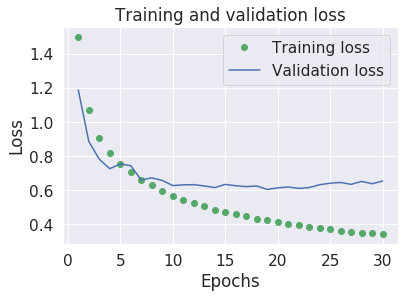

In [0]:
# Plotting the training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

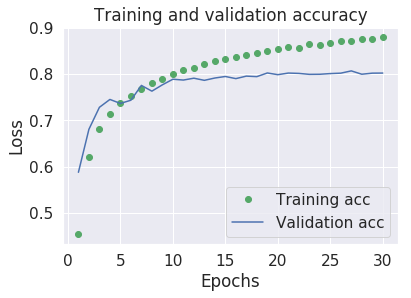

In [0]:
# Plotting the training and validation accuracy
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The CNN model still appears to be overfitting with performance maxing out early.

Create a confusion matrix to assess accuracy.

In [0]:
# create confusion matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[844  10  29  10  13   1  10   4  49  30]
 [ 10 886   3   2   0   1  10   1  13  74]
 [ 55   2 687  36  71  42  76  17  10   4]
 [ 31   7  46 606  59 106 104  22  12   7]
 [  8   2  43  44 802  14  53  26   5   3]
 [ 14   0  44 151  50 676  38  20   3   4]
 [  6   2  18  21  20   4 920   1   6   2]
 [ 14   3  23  40  49  31  12 821   2   5]
 [ 50  16   6   9   5   1   8   1 875  29]
 [ 21  38   2  10   2   1   4   2  14 906]]


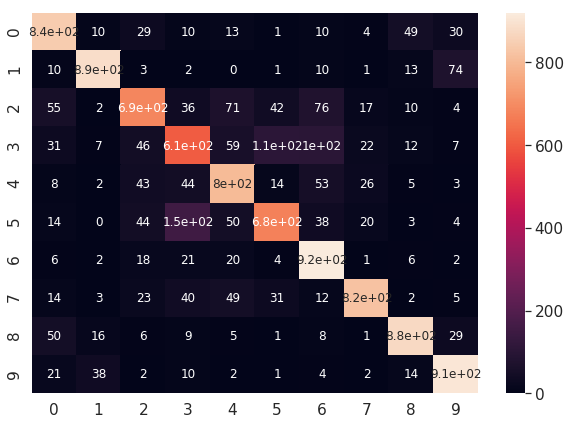

In [0]:
# Visualizing of confusion matrix
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

#### Data Augmentation

For data augmentation we will rotate the images, shift the width x height, and randomly flip inputs horizontally.

In [0]:
# data augmentation
datagen = ImageDataGenerator(
    rotation_range=15, #degree range for random rotations
    width_shift_range=0.1, #shift fraction of total width
    height_shift_range=0.1, #shift fraction of total height
    horizontal_flip=True, #randomly flip inputs horizontally
    )
datagen.fit(x_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


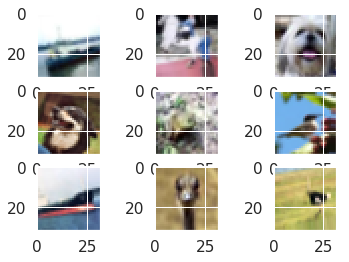

In [0]:
# check to see if data augmentation worked by plotting images
from scipy.misc import toimage
img_rows, img_cols = 32, 32
# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(toimage(X_batch[i].reshape(img_rows, img_cols, 3)))
    # show the plot
    plt.show()
    break

It appears the image samples have been slightly rotated or shifted from data augmentation.

#### Deep CNN with Data Augmentation

We will build a 6 layered convolution neural network followed by flatten layer. The output layer is dense layer of 10 nodes (as there are 10 classes) with softmax activation.

In [0]:
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [0]:
# training parameters
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

In [0]:
# train the model with the augmented data
%%time
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=125,\
                    verbose=1,validation_data=(x_test,y_test))

Epoch 1/125
781/781 [==============================] - 27s 35ms/step - loss: 1.9037 - acc: 0.4199 - val_loss: 1.3389 - val_acc: 0.5779
Epoch 2/125
781/781 [==============================] - 24s 31ms/step - loss: 1.2867 - acc: 0.5853 - val_loss: 1.2015 - val_acc: 0.6293
Epoch 3/125
781/781 [==============================] - 24s 31ms/step - loss: 1.0911 - acc: 0.6506 - val_loss: 0.9162 - val_acc: 0.7183
Epoch 4/125
781/781 [==============================] - 25s 32ms/step - loss: 0.9879 - acc: 0.6870 - val_loss: 1.0611 - val_acc: 0.6837
Epoch 5/125
781/781 [==============================] - 25s 32ms/step - loss: 0.9300 - acc: 0.7071 - val_loss: 0.8751 - val_acc: 0.7320
Epoch 6/125
781/781 [==============================] - 27s 34ms/step - loss: 0.8810 - acc: 0.7288 - val_loss: 0.8655 - val_acc: 0.7498
Epoch 7/125
781/781 [==============================] - 24s 31ms/step - loss: 0.8452 - acc: 0.7436 - val_loss: 0.7582 - val_acc: 0.7805
Epoch 8/125
781/781 [==============================] - 

In [0]:
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 1s 66us/step

Test result: 84.040 loss: 0.672


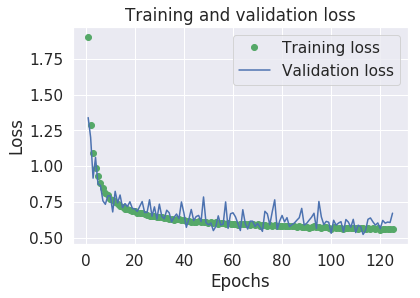

In [0]:
# Plotting the training and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

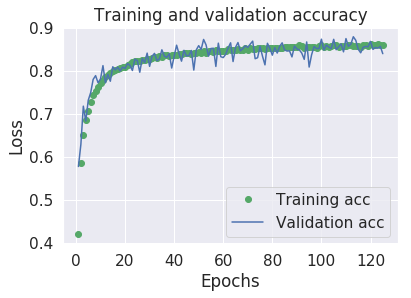

In [0]:
# Plotting the training and validation accuracy
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'go', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
# create confusion matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[894  22   2   0   5   0   5   3  37  32]
 [  3 960   0   0   0   0   0   0   3  34]
 [ 79   9 717   9  26  17  80  23  13  27]
 [ 33  26  28 536  25  71 171  40  19  51]
 [ 12   2  15   7 828   6  70  49   4   7]
 [  8  15  18  38  20 703  81  65  11  41]
 [  5   5   7   0   1   0 967   3   5   7]
 [  6   8   3   4  11   2  11 941   3  11]
 [ 22  33   0   0   0   0   3   1 918  23]
 [  5  46   1   0   0   0   1   0   7 940]]


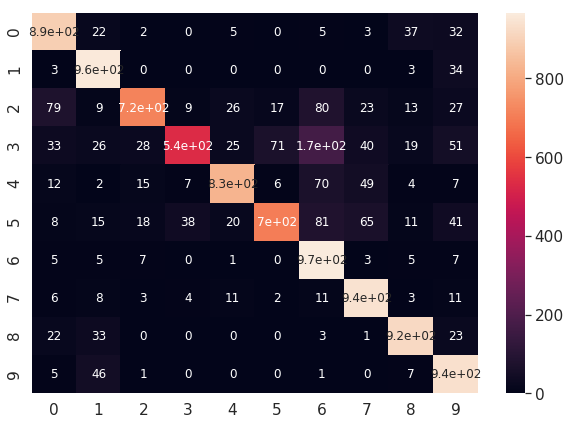

In [0]:
# Visualizing of confusion matrix

df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

#### Visualizing what convnets learn

In [0]:
img = x_test[50]

# We preprocess the image into a 4D tensor
from keras.preprocessing import image
import numpy as np

#img = image.load_img(img_path, target_size=(32, 32))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.

# Its shape is (1, 32, 32, 3)
print(img_tensor.shape)

(1, 32, 32, 3)


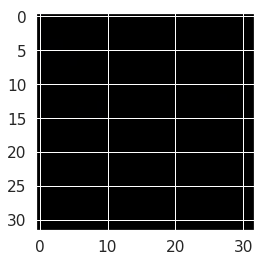

In [0]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [0]:
from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 32, 32, 32)


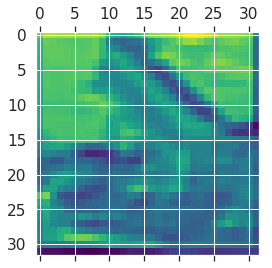

In [0]:
import matplotlib.pyplot as plt

plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

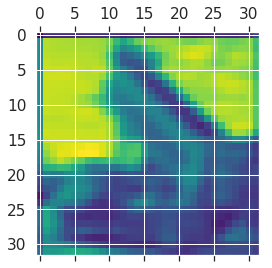

In [0]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

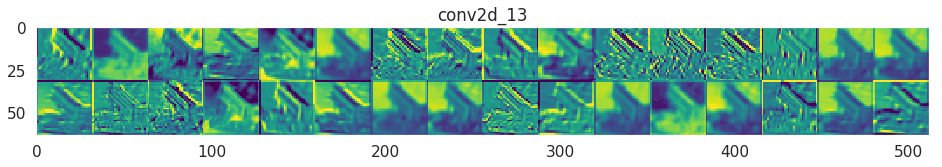

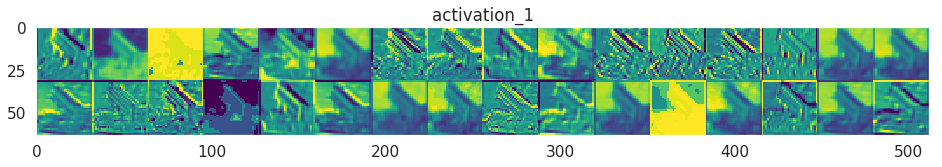

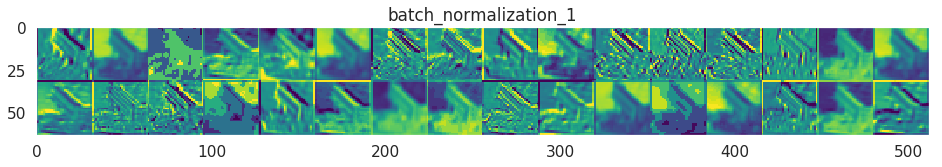

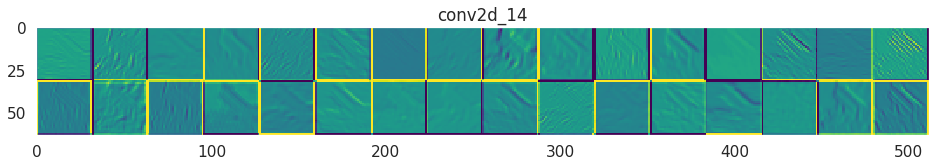

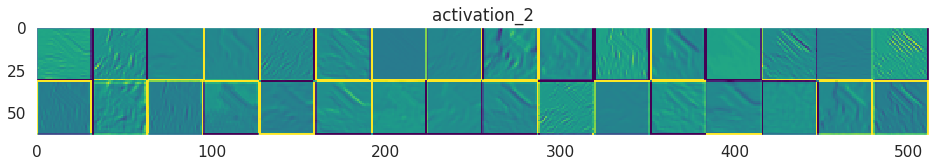

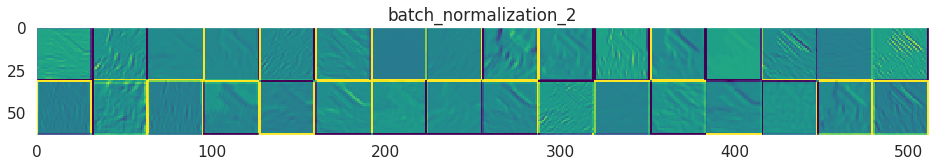

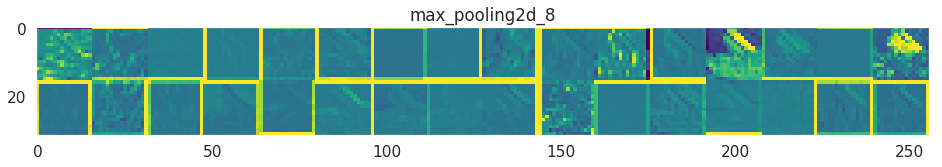

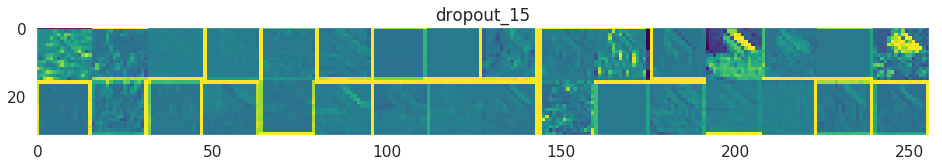

In [0]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

### Section 4:  Conclusion

**Management problem: ** Suppose you are asked to develop a neural network model for a computer vision task such as facial recognition of the user of a mobile device such as a cell phone. Rather than requiring a log-in user name and password or a four-digit key-code, the device requires facial recognition of the user. How would you go about training such a model? Would such a model require deep learning (more than one hidden layer of nodes)/ Would there be any advantage to employing convolutional layers? How would you judge the model's accuracy with real data examples, such as recognition of the face for a cell phone user?

>**Summary Table of Models:**


>Model Type | Number of Layers | Nodes Per Layer | Number of Epochs | Processing Time | Train Accuracy | Test Accuracy
>--- | ---
>DNN | 1 | 512  | 30 | 6min 41s | 0.7859 | 0.4497
>CNN | 2 | 32, 64 | 30 | 3min 34s | 0.8463 | 0.7584
>CNN | 4 | 32, 64  | 30 | 4min 14s | 0.8808 | 0.8023
>CNN | 6 | 32, 64, 128 | 125 | 1h 16min 24s | 0.8609 | 0.8404

**In Conclusion:**

After fitting a number of neural networks, processing time and performance was compared across experimental treatments.

The results showed:

*    DNN and shallow CNN models are prone to overfitting and do not lead to accurate predicitions for test images.
*    CNN models with dropout and max-pooling helped reduce overfitting and resulted in more accurate predictions for test images.
*    The deep CNN model with data augmentation and regularization resulted in the most accurate predictions for image data.

In summary, to address management, when developing a model for a computer vision task such as facial recognition a CNN would be advantageous. Training a CNN would help the algorithm find the user’s face in different places with a camera. After training the model with the user’s face, it may be beneficial to deploy data augmentation and to save the weights to increase speed and accuracy for logging-in to a cell phone. The network architecture is a key element in building a neural network model especially selection of the number of layers. The final recommendation is to implement the deep CNN model with six-layers and data augmentation. This model takes longer to process than other models with fewer layers, but results in the most accurate predictions and is the most trustworthy.
